# Python Demo 2

### Let's look into rotations

In [16]:
import numpy as np

In [17]:
from numpy import cos,sin
def T_matrix(theta):
    "Transformation matrix to rotate stress in 2D (stress represented as a 3x1 vector)"
    T = np.zeros((3,3))
    T[0,0] =  T[1,1] = cos(theta)**2
    T[0,1] =  T[1,0] = sin(theta)**2
    T[0,2] =  2*cos(theta)*sin(theta)
    T[1,2] = -2*cos(theta)*sin(theta)
    T[2,0] = -cos(theta)*sin(theta)
    T[2,1] =  cos(theta)*sin(theta)
    T[2,2] =  cos(theta)**2 - sin(theta)**2
    return T

def Tp_matrix(theta):
    "Transformation matrix to rotate strain in 2D (stress represented as a 3x1 vector)"
    Tp = np.zeros((3,3))
    Tp[0,0] =  Tp[1,1] = cos(theta)**2
    Tp[0,1] =  Tp[1,0] = sin(theta)**2
    Tp[0,2] =  cos(theta)*sin(theta)
    Tp[1,2] =  -cos(theta)*sin(theta)
    Tp[2,0] =  -2*cos(theta)*sin(theta)
    Tp[2,1] =  2*cos(theta)*sin(theta)
    Tp[2,2] =  cos(theta)**2 - sin(theta)**2
    return Tp

## Rotate a Stress Tensor

In [26]:
#sp = T*s
s = np.array([100,50,10])
th = np.pi/3
T = T_matrix(th)
sp = T.dot(s)
print(s)
print(sp)

[100  50  10]
[ 71.16025404  78.83974596 -26.65063509]


## Rotate a Strain Tensor

In [33]:
#ep = Tp*e
e = np.array([1,3,0.2])*1e-3
th = np.pi/3
Tp = Tp_matrix(th)
ep = Tp.dot(e)
print(e)
print(ep)

[0.001  0.003  0.0002]
[0.0025866  0.0014134  0.00163205]


## Rotate a Stiffness Matrix

In [38]:
#Cp = Tinv*C*Tp
C = np.array([[100,20,0],[20,30,0],[0,0,15]])
th = np.pi/4
T = T_matrix(th)
Tp = Tp_matrix(th)
Cp = np.linalg.inv(T).dot(C).dot(Tp)
print(C)
print(np.round(Cp,6))

[[100  20   0]
 [ 20  30   0]
 [  0   0  15]]
[[57.5 27.5 17.5]
 [27.5 57.5 17.5]
 [17.5 17.5 22.5]]


## Rotate a Compliance Matrix

In [45]:
#Sp = Tpinv*S*T
S = np.linalg.inv(C)
th = np.pi/3
T = T_matrix(th)
Tp = Tp_matrix(th)
Sp = np.linalg.inv(Tp).dot(S).dot(T)
print(S)
print(np.round(Sp,6))

[[ 0.01153846 -0.00769231  0.        ]
 [-0.00769231  0.03846154  0.        ]
 [ 0.          0.          0.06666667]]
[[ 0.031971 -0.007933 -0.01138 ]
 [-0.007933  0.01851  -0.011936]
 [-0.01138  -0.011936  0.065705]]


## Make a Plot

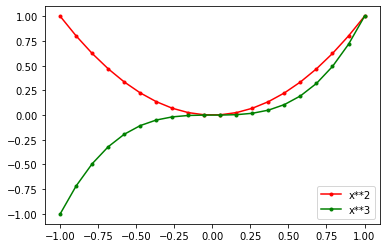

In [54]:
import matplotlib as mpl
import matplotlib.pyplot as plt

x = np.linspace(-1,1,20)
y = x**2
y2 = x**3

fig = plt.figure(1)
ax = fig.gca()
ax.plot(x,y,'r.-',label='x**2')
ax.plot(x,y2,'g.-',label='x**3')
ax.legend()